In [ ]:
%cd /content/drive/Shareddrives/CSE544_Project/covid_dataset
!ls

/content/drive/Shareddrives/CSE544_Project/covid_dataset
backup
colab_pdf.py
COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv
covid_la_cleaned.csv
covid_la_cleaned_removed_outliers.csv
covid_md_cleaned.csv
covid_md_cleaned_removed_outliers.csv
__pycache__
United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv
vacc_la_clean.csv
vacc_la_clean_removed_outliers.csv
vacc_md_clean.csv
vacc_md_clean_removed_outliers.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_covid = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df_vacc = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [ ]:
# taking only states assigned to us and creating 4 dataframes out them for covid and vacc each 2.
df_covid_md = df_covid[df_covid['state'] == 'MD']
df_covid_la = df_covid[df_covid['state'] == 'LA']
df_vacc_md = df_vacc[df_vacc['Location'] == 'MD']
df_vacc_la = df_vacc[df_vacc['Location'] == 'LA']

In [ ]:
# sorting using date for covid dataset
df_covid_md['submission_date'] = pd.to_datetime(df_covid_md['submission_date'])
df_covid_md_sorted = df_covid_md.sort_values(by=['submission_date'])
df_covid_la['submission_date'] = pd.to_datetime(df_covid_la['submission_date'])
df_covid_la_sorted = df_covid_la.sort_values(by=['submission_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_covid_md_sorted.head(-10)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
33516,2020-01-22,MD,0,NaN,NaN,0,0.0,0,0.0,0.0,0,0.0,01/24/2020 12:00:00 AM,NaN,Agree
32577,2020-01-23,MD,0,NaN,NaN,0,0.0,0,0.0,0.0,0,0.0,01/25/2020 12:00:00 AM,NaN,Agree
31837,2020-01-24,MD,0,NaN,NaN,0,0.0,0,0.0,0.0,0,0.0,01/26/2020 12:00:00 AM,NaN,Agree
12958,2020-01-25,MD,0,NaN,NaN,0,0.0,0,0.0,0.0,0,0.0,01/27/2020 12:00:00 AM,NaN,Agree
14085,2020-01-26,MD,0,NaN,NaN,0,0.0,0,0.0,0.0,0,0.0,01/28/2020 12:00:00 AM,NaN,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27001,2022-04-26,MD,1028752,NaN,NaN,2827,0.0,14441,14177.0,264.0,16,0.0,04/27/2022 01:16:30 PM,NaN,Agree
14166,2022-04-27,MD,1030144,NaN,NaN,1392,0.0,14449,14185.0,264.0,8,0.0,04/28/2022 01:30:29 PM,NaN,Agree
16209,2022-04-28,MD,1031533,NaN,NaN,1389,0.0,14456,14192.0,264.0,7,0.0,04/29/2022 02:05:11 PM,NaN,Agree
16124,2022-04-29,MD,1032775,NaN,NaN,1242,0.0,14462,14198.0,264.0,6,0.0,04/30/2022 01:19:13 PM,NaN,Agree


### Cleaning Covid cases data for Maryland and Lousiana

In [ ]:
# removing conf_cases,prob_cases,consent_cases,consent_deaths as they are not required
df_covid_md_sorted.drop(['conf_cases','prob_cases','consent_cases','consent_deaths'], axis = 1,inplace = True)
print("Checking for columns with null values: MD covid data")
print(df_covid_md_sorted.isnull().sum())

Checking for columns with null values: MD covid data
submission_date    0
state              0
tot_cases          0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
dtype: int64


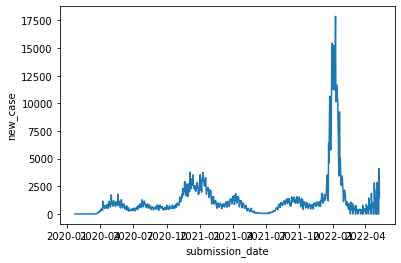

In [ ]:
sns.lineplot(data = df_covid_md_sorted, x ='submission_date', y = 'new_case')

In [ ]:
# removing conf_cases,prob_cases,consent_cases,consent_deaths as they are not required
df_covid_la_sorted.drop(['conf_cases','prob_cases','consent_cases','consent_deaths'], axis = 1,inplace = True)
print("Checking for columns with null values: LA covid data")
print(df_covid_la_sorted.isnull().sum())

Checking for columns with null values: LA covid data
submission_date     0
state               0
tot_cases           0
new_case            0
pnew_case          88
tot_death           0
conf_death         88
prob_death         88
new_death           0
pnew_death         88
created_at          0
dtype: int64


In [ ]:
# we are filling NaN with 0 becuase they are NaN as there were no new cases those day's hence will not be used and total gets directly calculated.
df_covid_la_sorted = df_covid_la_sorted.fillna(0) 
df_covid_la_sorted

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at
38716,2020-01-22,LA,0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM
37386,2020-01-23,LA,0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM
39902,2020-01-24,LA,0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM
39209,2020-01-25,LA,0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM
35083,2020-01-26,LA,0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM
...,...,...,...,...,...,...,...,...,...,...,...
37091,2022-05-06,LA,1175460,455,105.0,17276,14695.0,2581.0,3,2.0,05/07/2022 01:19:57 PM
37874,2022-05-07,LA,1175460,0,0.0,17276,14695.0,2581.0,0,0.0,05/09/2022 01:14:40 PM
21464,2022-05-08,LA,1175460,0,0.0,17276,14695.0,2581.0,0,0.0,05/09/2022 02:22:50 PM
22426,2022-05-09,LA,1176291,831,227.0,17285,14695.0,2590.0,9,9.0,05/10/2022 01:23:16 PM


### Removing outliers for COVID data using Tukey's Rule for Maryland and Louisiana



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


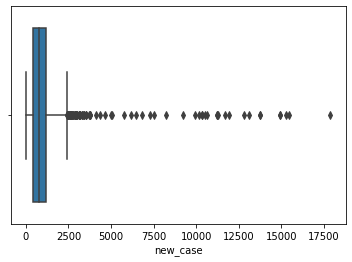

In [ ]:
# Plotting box plot to check for outliers
sns.boxplot(df_covid_md_sorted['new_case'])

In [ ]:
"""
Applying the Tukey's rule
1. Find the interquartiles Q1 and Q3.
2. Computing the interquartile range
3. Computing the upper and lower bound
"""
Q3 = df_covid_md_sorted['new_case'].quantile(0.75)
Q1 = df_covid_md_sorted['new_case'].quantile(0.25)
IQR = Q3 - Q1
alpha = 1.5
upper_bound = Q3 + alpha * IQR 
lower_bound = Q1 - alpha * IQR

In [ ]:
print("Upper bound for new cases for MD data", upper_bound)
print("Lower bound for new cases for MD data", lower_bound)

Upper bound for new cases for MD data 2409.0
Lower bound for new cases for MD data -801.0


In [ ]:
print("Shape of MD covid data before removing outliers for new cases")
df_covid_md_sorted.shape

Shape of MD covid data before removing outliers for new cases


(840, 11)

In [ ]:
df_covid_md_sorted.drop(df_covid_md_sorted[df_covid_md_sorted['new_case'] > upper_bound].index, inplace = True)
df_covid_md_sorted.drop(df_covid_md_sorted[df_covid_md_sorted['new_case'] < lower_bound].index, inplace = True)

In [ ]:
print("Shape of MD covid data after removing outliers for new cases")
df_covid_md_sorted.shape

Shape of MD covid data after removing outliers for new cases


(759, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


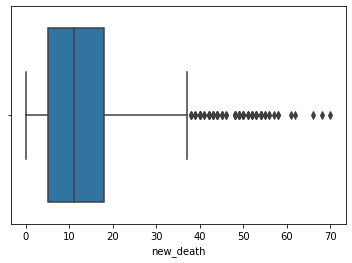

In [ ]:
# Plotting box plot for new death to check outliers
sns.boxplot(df_covid_md_sorted['new_death'])

In [ ]:
"""
Applying the Tukey's rule
1. Find the interquartiles Q1 and Q3.
2. Computing the interquartile range
3. Computing the upper and lower bound
"""
Q3 = df_covid_md_sorted['new_death'].quantile(0.75)
Q1 = df_covid_md_sorted['new_death'].quantile(0.25)
IQR = Q3 - Q1
alpha = 1.5
upper_bound = Q3 + alpha * IQR 
lower_bound = Q1 - alpha * IQR

In [ ]:
# Dropping rows with outliers
df_covid_md_sorted.drop(df_covid_md_sorted[df_covid_md_sorted['new_death'] > upper_bound].index, inplace = True)
df_covid_md_sorted.drop(df_covid_md_sorted[df_covid_md_sorted['new_death'] < lower_bound].index, inplace = True)

In [ ]:
"""
Applying the Tukey's rule
1. Find the interquartiles Q1 and Q3.
2. Computing the interquartile range
3. Computing the upper and lower bound
"""
Q3 = df_covid_la_sorted['new_case'].quantile(0.75)
Q1 = df_covid_la_sorted['new_case'].quantile(0.25)
IQR = Q3 - Q1
alpha = 1.5
upper_bound = Q3 + alpha * IQR 
lower_bound = Q1 - alpha * IQR

In [ ]:
df_covid_la_sorted.drop(df_covid_la_sorted[df_covid_la_sorted['new_case'] > upper_bound].index, inplace = True)
df_covid_la_sorted.drop(df_covid_la_sorted[df_covid_la_sorted['new_case'] < lower_bound].index, inplace = True)

In [ ]:
df_covid_la_sorted.shape

(740, 11)

In [ ]:
"""
Applying the Tukey's rule
1. Find the interquartiles Q1 and Q3.
2. Computing the interquartile range
3. Computing the upper and lower bound
"""
Q3 = df_covid_la_sorted['new_death'].quantile(0.75)
Q1 = df_covid_la_sorted['new_death'].quantile(0.25)
IQR = Q3 - Q1
alpha = 1.5
upper_bound = Q3 + alpha * IQR 
lower_bound = Q1 - alpha * IQR

In [ ]:
# Removing outliers that have new deaths > upper bound and new deaths less than lower bound
df_covid_la_sorted.drop(df_covid_la_sorted[df_covid_la_sorted['new_death'] > upper_bound].index, inplace = True)
df_covid_la_sorted.drop(df_covid_la_sorted[df_covid_la_sorted['new_death'] < lower_bound].index, inplace = True)

In [ ]:
# Creating csv, uncomment to save data to csv
df_covid_md_sorted.to_csv('covid_md_cleaned_removed_outliers.csv')
df_covid_la_sorted.to_csv('covid_la_cleaned_removed_outliers.csv')
# df_covid_md_sorted.to_csv('covid_md_cleaned.csv')
# df_covid_la_sorted.to_csv('covid_la_cleaned.csv')

### Cleaning Vaccination Maryland and Lousiana data

In [ ]:
# sorting using date for vac dataset
df_vacc_md['Date'] = pd.to_datetime(df_vacc_md['Date'])
df_vacc_md_sorted = df_vacc_md.sort_values(by=['Date'])
df_vacc_la['Date'] = pd.to_datetime(df_vacc_la['Date'])
df_vacc_la_sorted = df_vacc_la.sort_values(by=['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# columns to drop: these columns have more than 40% NaN therefore we remove them as they will not contri to any inference
df_vacc_md_sorted.drop(df_vacc_md_sorted.columns[df_vacc_md_sorted.isnull().sum()>300],inplace =True,axis = 1)

In [ ]:
# now for rest nan we fill NaN with median values as ......(mean doesnt make sense beacuse there cound be extreme outlies with one day 0 and next day 1000 doses giving 500 doese as filler)
df_vacc_md_sorted = df_vacc_md_sorted.fillna(df_vacc_md_sorted.median())
print("Checking for NaN values covid vaccination MD data")
print(df_vacc_md_sorted.isnull().sum())

Checking for NaN values covid vaccination MD data
Date                            0
MMWR_week                       0
Location                        0
Distributed                     0
Distributed_Janssen             0
                               ..
Series_Complete_5Plus           0
Series_Complete_5PlusPop_Pct    0
Administered_5Plus              0
Admin_Per_100k_5Plus            0
Distributed_Per_100k_5Plus      0
Length: 76, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#  same prepeocessing as done above for MD is done for LA 
# columns to drop: these columns have more than 40% NaN therefore we remove them as they will not contri to any inference
df_vacc_la_sorted.drop(df_vacc_la_sorted.columns[df_vacc_la_sorted.isnull().sum()>300],inplace =True,axis = 1)
# now for rest nan we fill NaN with median values as ......(mean doesnt make sense beacuse there cound be extreme outlies with one day 0 and next day 1000 doses giving 500 doese as filler)
df_vacc_la_sorted = df_vacc_la_sorted.fillna(df_vacc_la_sorted.median())
print("Checking for NaN values in LA data")
print(df_vacc_la_sorted.isnull().sum())

Checking for NaN values in LA data
Date                            0
MMWR_week                       0
Location                        0
Distributed                     0
Distributed_Janssen             0
                               ..
Series_Complete_5Plus           0
Series_Complete_5PlusPop_Pct    0
Administered_5Plus              0
Admin_Per_100k_5Plus            0
Distributed_Per_100k_5Plus      0
Length: 76, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


###Removing outliers for COVID Vaccination data of Maryland and Louisiana using Tukey's Rule

In [ ]:
new_df_vacc_md_sorted = df_vacc_md_sorted[['Date','Administered']]
new_df_vacc_md_sorted ["Administered_daily"] = " "

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Getting daily administered doses count from cumulative administered counts in MD
new_df_vacc_md_sorted['Administered_daily'] = new_df_vacc_md_sorted['Administered'].shift(-1) - new_df_vacc_md_sorted['Administered']
new_df_vacc_md_sorted['Administered_daily'] = new_df_vacc_md_sorted['Administered_daily'].shift(1)
new_df_vacc_md_sorted.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Administered,Administered_daily
33168,2020-12-14,0,NaN
33087,2020-12-15,0,0.0
33033,2020-12-16,0,0.0
32956,2020-12-17,3,3.0
32897,2020-12-18,521,518.0
32839,2020-12-19,521,0.0
32761,2020-12-20,3838,3317.0
32704,2020-12-21,4667,829.0
32622,2020-12-22,4928,261.0
32567,2020-12-23,8284,3356.0


In [ ]:
# Filling NaN values with 0
new_df_vacc_md_sorted.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


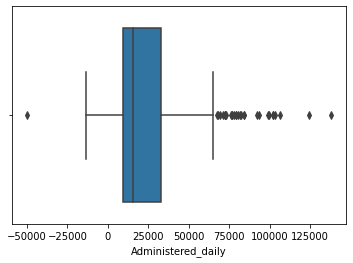

In [ ]:
# Box Plot for daily administered vaccines 
sns.boxplot(new_df_vacc_md_sorted['Administered_daily'])

In [ ]:
"""
Applying the Tukey's rule
1. Find the interquartiles Q1 and Q3.
2. Computing the interquartile range
3. Computing the upper and lower bound
"""
Q3 = new_df_vacc_md_sorted['Administered_daily'].quantile(0.75)
Q1 = new_df_vacc_md_sorted['Administered_daily'].quantile(0.25)
IQR = Q3 - Q1
alpha = 1.5
upper_bound = Q3 + alpha * IQR 
lower_bound = Q1 - alpha * IQR

In [ ]:
new_df_vacc_md_sorted.drop(new_df_vacc_md_sorted[new_df_vacc_md_sorted['Administered_daily'] > upper_bound].index, inplace = True)
new_df_vacc_md_sorted.drop(new_df_vacc_md_sorted[new_df_vacc_md_sorted['Administered_daily'] < lower_bound].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
ndf = new_df_vacc_md_sorted[new_df_vacc_md_sorted['Administered_daily'] >= 0]

In [ ]:
ndf.head(20)

,Date,Administered,Administered_daily
33168,2020-12-14,0,0.0
33087,2020-12-15,0,0.0
33033,2020-12-16,0,0.0
32956,2020-12-17,3,3.0
32897,2020-12-18,521,518.0
32839,2020-12-19,521,0.0
32761,2020-12-20,3838,3317.0
32704,2020-12-21,4667,829.0
32622,2020-12-22,4928,261.0
32567,2020-12-23,8284,3356.0


In [ ]:
# Convert to csv
ndf.to_csv('vacc_md_clean_removed_outliers.csv',index=False)
# df_vacc_md_sorted.to_csv('vacc_md_clean.csv')

In [ ]:
# Outlier removal of daily administered data for LA
new_df_vacc_la_sorted = df_vacc_la_sorted[['Date','Administered']]
new_df_vacc_la_sorted ["Administered_daily"] = " "

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Getting daily administered doses count from cumulative administered counts in LA
new_df_vacc_la_sorted['Administered_daily'] = new_df_vacc_la_sorted['Administered'].shift(-1) - new_df_vacc_la_sorted['Administered']
new_df_vacc_la_sorted['Administered_daily'] = new_df_vacc_la_sorted['Administered_daily'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Filling NaN with 0s
new_df_vacc_la_sorted.fillna(0, inplace=True)
new_df_vacc_la_sorted

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Date,Administered,Administered_daily
33140,2020-12-14,0,0.0
33075,2020-12-15,0,0.0
33044,2020-12-16,0,0.0
32965,2020-12-17,0,0.0
32875,2020-12-18,0,0.0
...,...,...,...
313,2022-05-07,6256376,184.0
227,2022-05-08,6260335,3959.0
145,2022-05-09,6262278,1943.0
73,2022-05-10,6262975,697.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


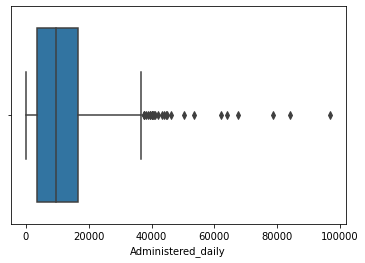

In [ ]:
# Boxplot plotted to check outliers for daily administered dosese
sns.boxplot(new_df_vacc_la_sorted['Administered_daily'])

In [ ]:
"""
Applying the Tukey's rule
1. Find the interquartiles Q1 and Q3.
2. Computing the interquartile range
3. Computing the upper and lower bound
"""
Q3 = new_df_vacc_la_sorted['Administered_daily'].quantile(0.75)
Q1 = new_df_vacc_la_sorted['Administered_daily'].quantile(0.25)
IQR = Q3 - Q1
alpha = 1.5
upper_bound = Q3 + alpha * IQR 
lower_bound = Q1 - alpha * IQR

In [ ]:
# Removing outliers
new_df_vacc_la_sorted.drop(new_df_vacc_la_sorted[new_df_vacc_la_sorted['Administered_daily'] > upper_bound].index, inplace = True)
new_df_vacc_la_sorted.drop(new_df_vacc_la_sorted[new_df_vacc_la_sorted['Administered_daily'] < lower_bound].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Convert to csv
new_df_vacc_la_sorted.to_csv('vacc_la_clean_removed_outliers.csv',index=False)
# df_vacc_la_sorted.to_csv('vacc_la_clean.csv')

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic &> /dev/null
!jupyter nbconvert --to pdf /content/drive/Shareddrives/CSE544_Project/cleaning/cleaning.ipynb  &> /dev/null